In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generating Random Dataset

In [2]:
X = np.vstack([(np.random.randn(10, 2)*4),(np.random.randn(10, 2)*10)])
Y = np.hstack([[0]*10,[1]*10])
dataset = pd.DataFrame(X, columns=['X1','X2'])
dataset["Y"] = Y

# Random Data set generated

In [3]:
dataset

,X1,X2,Y
0,-2.180745,1.871904,0
1,-0.119692,-1.607762,0
2,3.613031,-2.214546,0
3,0.771843,6.282591,0
4,9.292810,-1.865715,0
5,-8.246895,-1.125886,0
6,1.440079,-5.643849,0
7,0.493072,-0.083938,0
8,-1.426817,0.581496,0
9,-4.949892,-2.155757,0


### Generating plot

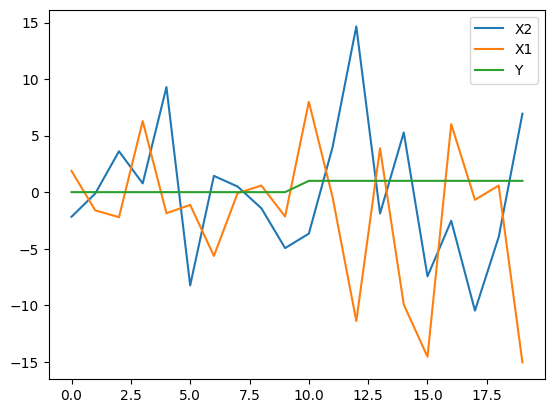

In [4]:
plt.plot(dataset, label='Inline label')
plt.legend(["X2", "X1", "Y"])

### Generating target variable to vector of number of classes 

In [5]:
Z = np.zeros((20, 2))
for i in range(20):
    Z[i, Y[i]] = 1

In [6]:
X.shape

(20, 2)

### Initiating Random Weights and Biases

In [7]:
Wi_1 = np.random.randn(3, 2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3, 2)
Bi_2 = np.random.randn(2)

In [8]:
Wi_1, Bi_1, Wi_2, Bi_2

(array([[-0.03880324, -0.31589495],
        [-0.06746674,  1.8869031 ],
        [-0.29497455, -2.01580263]]),
 array([-0.0101064 ,  2.20459203, -0.76592949]),
 array([[-0.70508453,  0.78723505],
        [-0.25025161,  0.30804221],
        [-0.30783707,  0.50977064]]),
 array([ 1.23334623, -0.47819557]))

In [9]:
Wi_1.T

array([[-0.03880324, -0.06746674, -0.29497455],
       [-0.31589495,  1.8869031 , -2.01580263]])

In [10]:
X

array([[ -2.18074518,   1.87190352],
       [ -0.11969167,  -1.6077617 ],
       [  3.61303051,  -2.21454571],
       [  0.77184293,   6.28259098],
       [  9.2928102 ,  -1.86571512],
       [ -8.24689507,  -1.12588555],
       [  1.44007922,  -5.64384898],
       [  0.49307243,  -0.08393823],
       [ -1.42681683,   0.5814958 ],
       [ -4.94989209,  -2.15575709],
       [ -3.6695514 ,   7.98724906],
       [  3.97750158,  -0.44359661],
       [ 14.65106815, -11.3997359 ],
       [ -1.8880806 ,   3.87829456],
       [  5.27421623,  -9.94733716],
       [ -7.44960502, -14.55156967],
       [ -2.5330762 ,   6.01455678],
       [-10.48206729,  -0.68323126],
       [ -3.96943563,   0.5902116 ],
       [  6.94008109, -15.06422105]])

In [11]:
X.shape

(20, 2)

In [12]:
X.dot(Wi_1.T)

array([[-5.06704897e-01,  3.67922832e+00, -3.13012370e+00],
       [ 5.12528226e-01, -3.02561532e+00,  3.27623625e+00],
       [ 5.59366526e-01, -4.42239255e+00,  3.39833500e+00],
       [-2.01458877e+00,  1.18025666e+01, -1.28921374e+01],
       [ 2.28778863e-01, -4.14737924e+00,  1.01977090e+00],
       [ 6.75667789e-01, -1.56804581e+00,  4.70218724e+00],
       [ 1.72698366e+00, -1.07465536e+01,  1.09520989e+01],
       [ 7.38285666e-03, -1.91649296e-01,  2.37590867e-02],
       [-1.28326475e-01,  1.19348891e+00, -7.51306107e-01],
       [ 8.73064616e-01, -3.73375164e+00,  5.80567301e+00],
       [-2.38074117e+00,  1.53187376e+01, -1.50182933e+01],
       [-1.42100114e-02, -1.10537287e+00, -2.79058552e-01],
       [ 3.03261012e+00, -2.24986567e+01,  1.86579253e+01],
       [-1.15187003e+00,  7.44534866e+00, -7.26094063e+00],
       [ 2.93765691e+00, -1.91254955e+01,  1.84961088e+01],
       [ 4.88583617e+00, -2.69548013e+01,  3.15305363e+01],
       [-1.80167656e+00,  1.15197842e+01

### Defining the Forward Propogation function

In [13]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    # First layer
    M = 1/(1+np.exp(-(X.dot(Wi_1.T) + Bi_1)))
    # Second layer
    A = M.dot(Wi_2) + Bi_2
    # Softmax
    expA = np.exp(A)
    Y = expA/expA.sum(axis=1, keepdims=True)
    return Y, M

In [14]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.64129419, 0.35870581],
        [0.46381987, 0.53618013],
        [0.48697792, 0.51302208],
        [0.72694781, 0.27305219],
        [0.5875225 , 0.4124775 ],
        [0.39145282, 0.60854718],
        [0.40824569, 0.59175431],
        [0.55235658, 0.44764342],
        [0.58167519, 0.41832481],
        [0.43788181, 0.56211819],
        [0.73654391, 0.26345609],
        [0.58490387, 0.41509613],
        [0.37072386, 0.62927614],
        [0.68941479, 0.31058521],
        [0.37225306, 0.62774694],
        [0.35730374, 0.64269626],
        [0.71984413, 0.28015587],
        [0.37275053, 0.62724947],
        [0.54533926, 0.45466074],
        [0.3585529 , 0.6414471 ]]),
 array([[3.73598160e-01, 9.97223601e-01, 1.99172036e-02],
        [6.23028300e-01, 3.05546487e-01, 9.24861211e-01],
        [6.33963917e-01, 9.81633464e-02, 9.32918247e-01],
        [1.16634372e-01, 9.99999174e-01, 1.17051341e-06],
        [5.54451310e-01, 1.25341971e-01, 5.63121775e-01],
        [6.60508568e-01, 6.5

## Back Propogation by Differentiating or Gradient Descent

In [15]:
# returns gradient for weights_2
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z-Y)

In [16]:
# returns gradient for weights_1
def diff_Wi_1(X, H, Z, output, Wi_2):
    dZ = (Z-output).dot(Wi_2.T) * H * (1-H)
    return X.T.dot(dZ)

In [17]:
# returns derivative for both biases
def diff_Bi2(Z, Y):
    return (Z-Y).sum(axis=0)

def diff_Bi1(Z, Y, Wi_2, H):
    return ((Z-Y).dot(Wi_2.T) * H * (1-H)).sum(axis=0)

In [18]:
learning_rate = 1e-3
for epoch in range(200000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += learning_rate * diff_Wi_2(hidden, Z, output)
    Bi_2 += learning_rate * diff_Bi2(Z, output)
    Wi_1 += learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2).T
    Bi_1 += learning_rate * diff_Bi1(Z, output, Wi_2, hidden)

### Generating predectition at new datapoint

In [26]:
X_test = np.array([1,2])

hidden_output = 1/(1+np.exp(-(X_test.dot(Wi_1.T) + Bi_1)))
Outer_layer_output = hidden_output.dot(Wi_2) + Bi_2
expA = np.exp(Outer_layer_output)
Y = expA/expA.sum()
print(" porb of class 0 >>>>>>>>>>>>> {} \n prob of class 1 >>>>>>>>>>>>> {} ".format(Y[0], Y[1]))

 porb of class 0 >>>>>>>>>>>>> 0.5215862337292563 
 prob of class 1 >>>>>>>>>>>>> 0.4784137662707437 
